Maira Zabuscha de Lima - 21008214

# Aprendizado Supervisionado e K Vizinhos mais Próximos

## Introdução

Nós utilizaremos a base de dados de taxa de rejeição da indústria de telecomunicações para essa lista de exercícios. A base de dados tem o nome `Orange_Telecom_Churn_Data.csv`. Nesse notebook carregaremos a base de dados, faremos algum pré-processamento e usaremos a técnica k-NN para predizer a taxa de rejeição baseado nas características mensuradas.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', module='sklearn')
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exercício 1

* Comece importando os dados através do pandas. Examine as colunas e os dados
* Note que os dados contêm estado, código de área e telefone. Você acha que esses atributos são interessantes para construir nosso modelo de classificação? Por que?

Não utilizaremos esses atributos para essa base, então eles podem ser removidos do dataframe (método `drop`).

- **R:** Não, pois eles não influenciam na rejeição e, portanto, na classificação.

In [2]:
arquivo = 'data/Orange_Telecom_Churn_Data.csv'
data = pd.read_csv(arquivo)
data.shape

(5000, 21)

In [3]:
data.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

In [4]:
data = data.drop(['state','area_code','phone_number'],axis=1)

## Exercício 2

* Note que algumas das colunas são categóricas e algumas são *float*. Esses atributos precisam ser numéricos para usar os algoritmos que aprenderemos no curso.
* Finalmente, o algoritmo K-Vizinhos mais próximos necessita de dados escalonados. Escalone os dados utilizando um dos métodos aprendidos em aula.

In [5]:
bin_cols = ['intl_plan', 'voice_mail_plan', 'churned']
for col in bin_cols:
    data[col] = LabelBinarizer().fit_transform(data[col])

In [6]:
scaled_data = pd.DataFrame(MinMaxScaler().fit_transform(data),columns=data.columns)

## Exercício 3

* Separe as colunas de atributos (todas menos `churned`) da  coluna de rótulo (`churned`). Isso criará duas tabelas.
* Aplique o método `.fit()` do K-nearest neighbors com um valor de `n_neighbors=3` para essa base de dados e verifique o resultado com o método `.predict()` na mesma base.

In [7]:
x_cols = [x for x in data.columns if x != 'churned']
X_data = scaled_data[x_cols]
y_data = scaled_data['churned']

In [8]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_data, y_data) 
prediction = classifier.predict(X_data)

## Exercício 4

Ainda não ensinamos formas de medir o erro, mas a acurácia é um conceito simples de entender--é a porcentagem de rótulos que foram corretamente classificados:

$acc = \frac{corretos}{total}$

* Escreva uma função para calcular a acurácia usando os rótulos verdadeiros e os preditos.
* Usando a função, calcule a acurácia do K-nn nos dados.

In [9]:
def accuracy(real, predict):
    test = real == predict
    correct = 0
    for x in test:
        if x == True:
            correct += 1
    return(correct/test.shape[0])

In [10]:
accuracy(y_data, prediction)

0.9422

## Exercício 5

* Repita a aplicação do modelo K-nearest neighbors mas com o parâmetro `weights='distance'`. Calcule a acurácia da função criada por você.
* Repita a aplicação do modelo com `n_neighbors=3`, `weights='uniform'` e `p=1` para utilizar a distância de Manhattan. Verifique os resultados.

Quando as distâncias ponderadas são utilizadas para a parte 1 dessa questão, vocês obterão acurácia de 1.0. Por que isso ocorre? *Dica:* o KNN usa diretamente os dados para fazer a predição.

In [11]:
classifier = KNeighborsClassifier(n_neighbors=3,weights='distance')
classifier.fit(X_data, y_data) 
prediction = classifier.predict(X_data)
accuracy(y_data, prediction)

1.0

In [12]:
classifier = KNeighborsClassifier(n_neighbors=3,weights='uniform',p=1)
classifier.fit(X_data, y_data) 
prediction = classifier.predict(X_data)
accuracy(y_data, prediction)

0.9456

## Exercício 6

* Teste o modelo KNN utilizando valores de `n_neighbors` na faixa de 1 a 20. Deixe o restante dos parâmetros como o padrão. Armazene os valores de vizinhos e acurácia em uma lista no formato [(k, acuracia)].
* Plote um gráfico do tipo *scatter* da acurácia vs vizinhos. O que acontece com `n_neighbors=1`? Por que isso ocorre?

- **R:** A acurácia é 1.0 pois só há um rótulo então é impossível errar.

In [13]:
score_list = list()

for i in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_data, y_data) 
    prediction = classifier.predict(X_data)
    score = accuracy(y_data, prediction)
    score_list.append([i,score])

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
print(score_df)

     k  accuracy
0    1    1.0000
1    2    0.9292
2    3    0.9422
3    4    0.9154
4    5    0.9284
5    6    0.9156
6    7    0.9254
7    8    0.9122
8    9    0.9224
9   10    0.9092
10  11    0.9158
11  12    0.9076
12  13    0.9148
13  14    0.9050
14  15    0.9098
15  16    0.9044
16  17    0.9080
17  18    0.9028
18  19    0.9078
19  20    0.9020


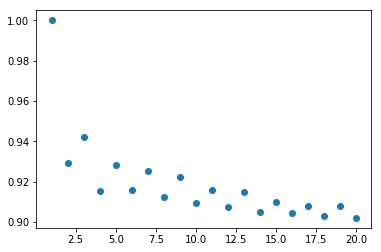

In [14]:
plt.plot(score_df['k'],score_df['accuracy'],ls ='',marker='o')

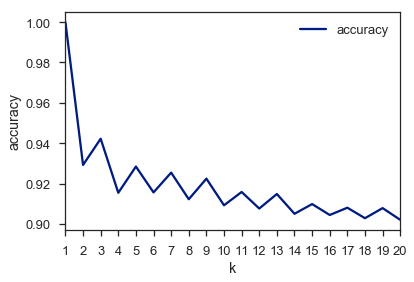

In [15]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));